In [1]:
import numpy as np
import pandas as pd 
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## err_data

In [2]:
os.listdir('../data/')

['train_quality_data.csv',
 'train_problem_data.csv',
 'test_err_data.csv',
 'sample_submission.csv',
 'test_quality_data.csv',
 'train_err_data.csv']

In [ ]:
train_err = pd.read_csv("../data/train_err_data.csv").drop_duplicates()
test_err = pd.read_csv("../data/test_err_data.csv").drop_duplicates()

In [4]:
time_data = train_err[['user_id','time']]

In [5]:
time_data['year'] =time_data.loc[:,'time'].astype("str").str[:4].astype("int")
time_data['month'] =time_data.loc[:,'time'].astype("str").str[4:6].astype("int")
time_data['days'] =time_data.loc[:,'time'].astype("str").str[6:8].astype("int")
time_data['hours'] =time_data.loc[:,'time'].astype("str").str[8:10].astype("int")
time_data['minites'] =time_data.loc[:,'time'].astype("str").str[10:12].astype("int")
time_data['sec'] =time_data.loc[:,'time'].astype("str").str[12:].astype("int")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [6]:
data_user_time_value = train_err[['user_id','time']].value_counts().reset_index()

#### 같은 시간 중복데이터 확인 , 최대 12개의 같은 시간 중복데이터 존재 -> error type 등이 다른경우

In [7]:
time_counts_d = data_user_time_value.sort_values(0,ascending=False).reset_index(drop=True)
time_counts_d.head()

,user_id,time,0
0,17423,20201103203126,12
1,17466,20201117234800,11
2,19052,20201104214813,10
3,24408,20201115091319,10
4,19195,20201122104212,10


#### pandas datetime 형식으로 변경

In [8]:
time_new_df = (time_counts_d['time']//(10**10)).astype("str") +"-"+(time_counts_d['time']//(10**8)%100).astype("str") +"-"+(time_counts_d['time']//(10**6)%100).astype("str") +" "+(time_counts_d['time']//(10**4)%100).astype("str")  +":"+(time_counts_d['time']//(10**2)%100).astype("str") +":"+(time_counts_d['time']%100).astype("str") 

In [9]:
time_counts_d['time2'] = pd.to_datetime(time_new_df)
time_counts_d['time3'] = pd.to_datetime(time_counts_d.time2.dt.strftime('%Y-%m-%d %H:%M'))
time_counts_d['time4'] = pd.to_datetime(time_counts_d.time2.dt.strftime('%Y-%m-%d %H'))

2020-10-31 00:00:00  is not 24 hours data
2020-12-01 00:00:00  is not 24 hours data


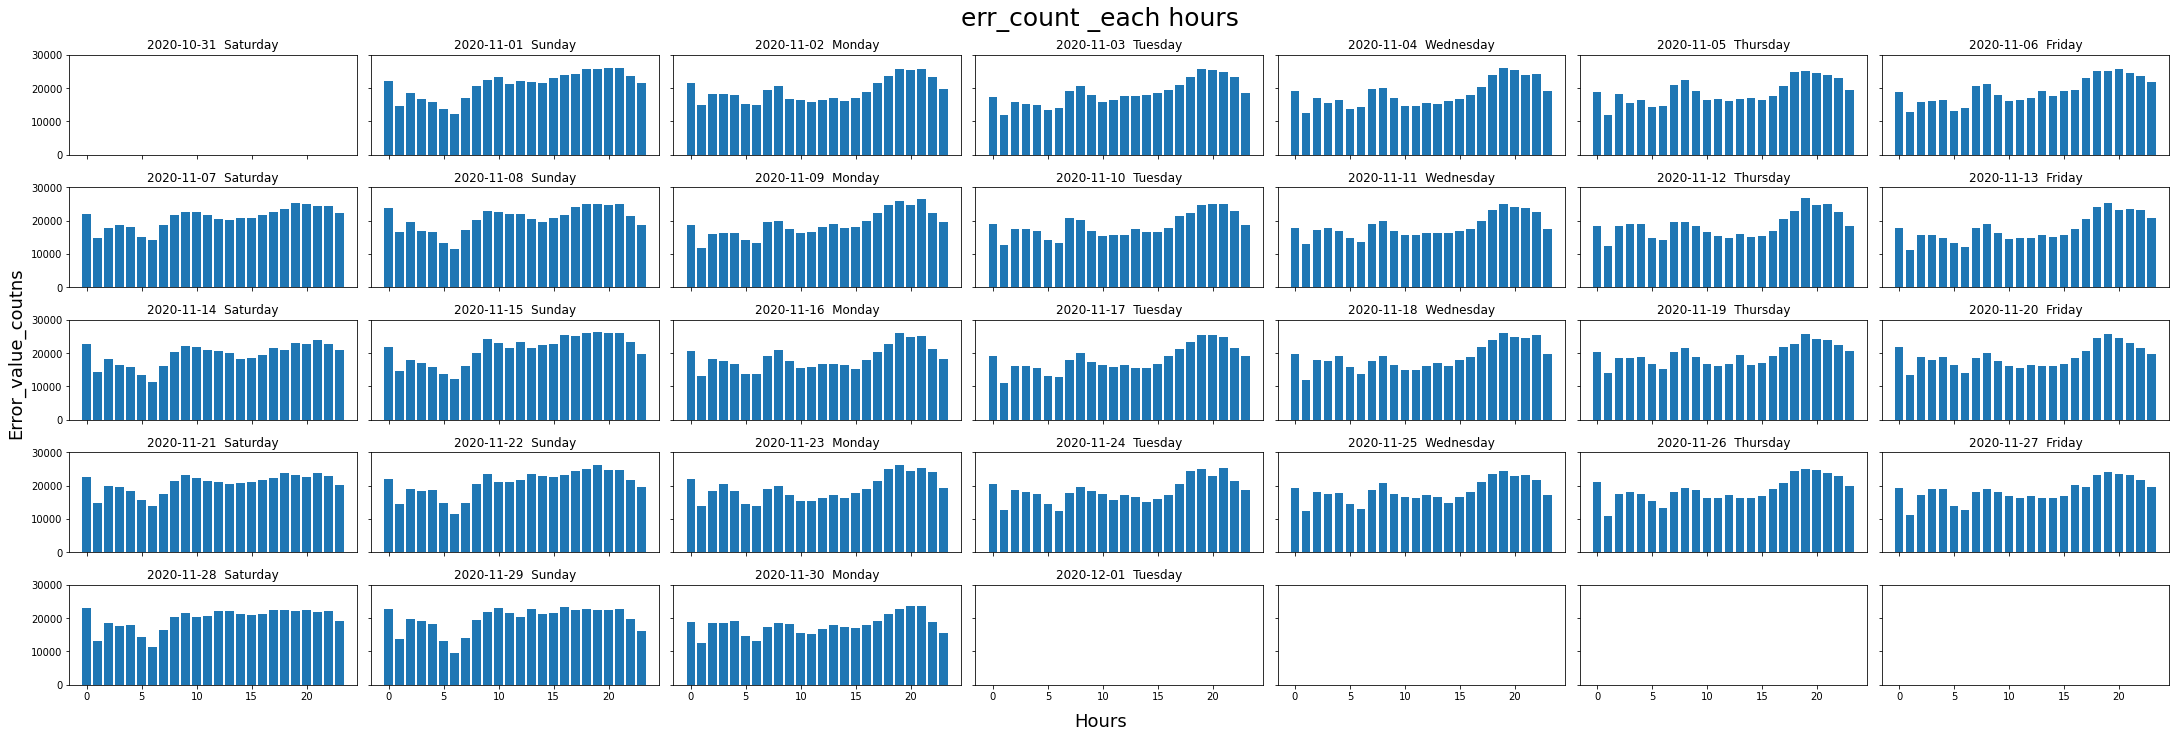

In [97]:

fig , axs = plt.subplots(nrows=5,ncols=7,figsize=(30,10), sharex=True, sharey=True)
plt.suptitle("err_count _each hours", size=25)

date = pd.to_datetime('2020-10-31')
df =time_counts_d[['time2']]

for days in range(32):
    rows =days//7
    cols =days%7
    
    
    date_time = df.loc[df.time2.dt.date ==date]
    loc_df = date_time.time2.dt.hour.value_counts().sort_index()
    
    if len(loc_df) !=24:
        print(date,' is not 24 hours data')
    
    axs[rows,cols].bar(range(len(loc_df)),loc_df.values)  
    axs[rows,cols].set_title(str(date)[:-9]+"  "+date.day_name())
    axs[rows,cols].set_ylim(0,30000)
    date += datetime.timedelta(days=1)

fig.text(0.5, -0.02, 'Hours', ha='center',fontsize=18)
fig.text(-0.006, 0.5, 'Error_value_coutns', va='center', rotation='vertical',fontsize=18)
    
fig.tight_layout()

2020-10-31 00:00:00  is not 24 hours data
2020-12-01 00:00:00  is not 24 hours data


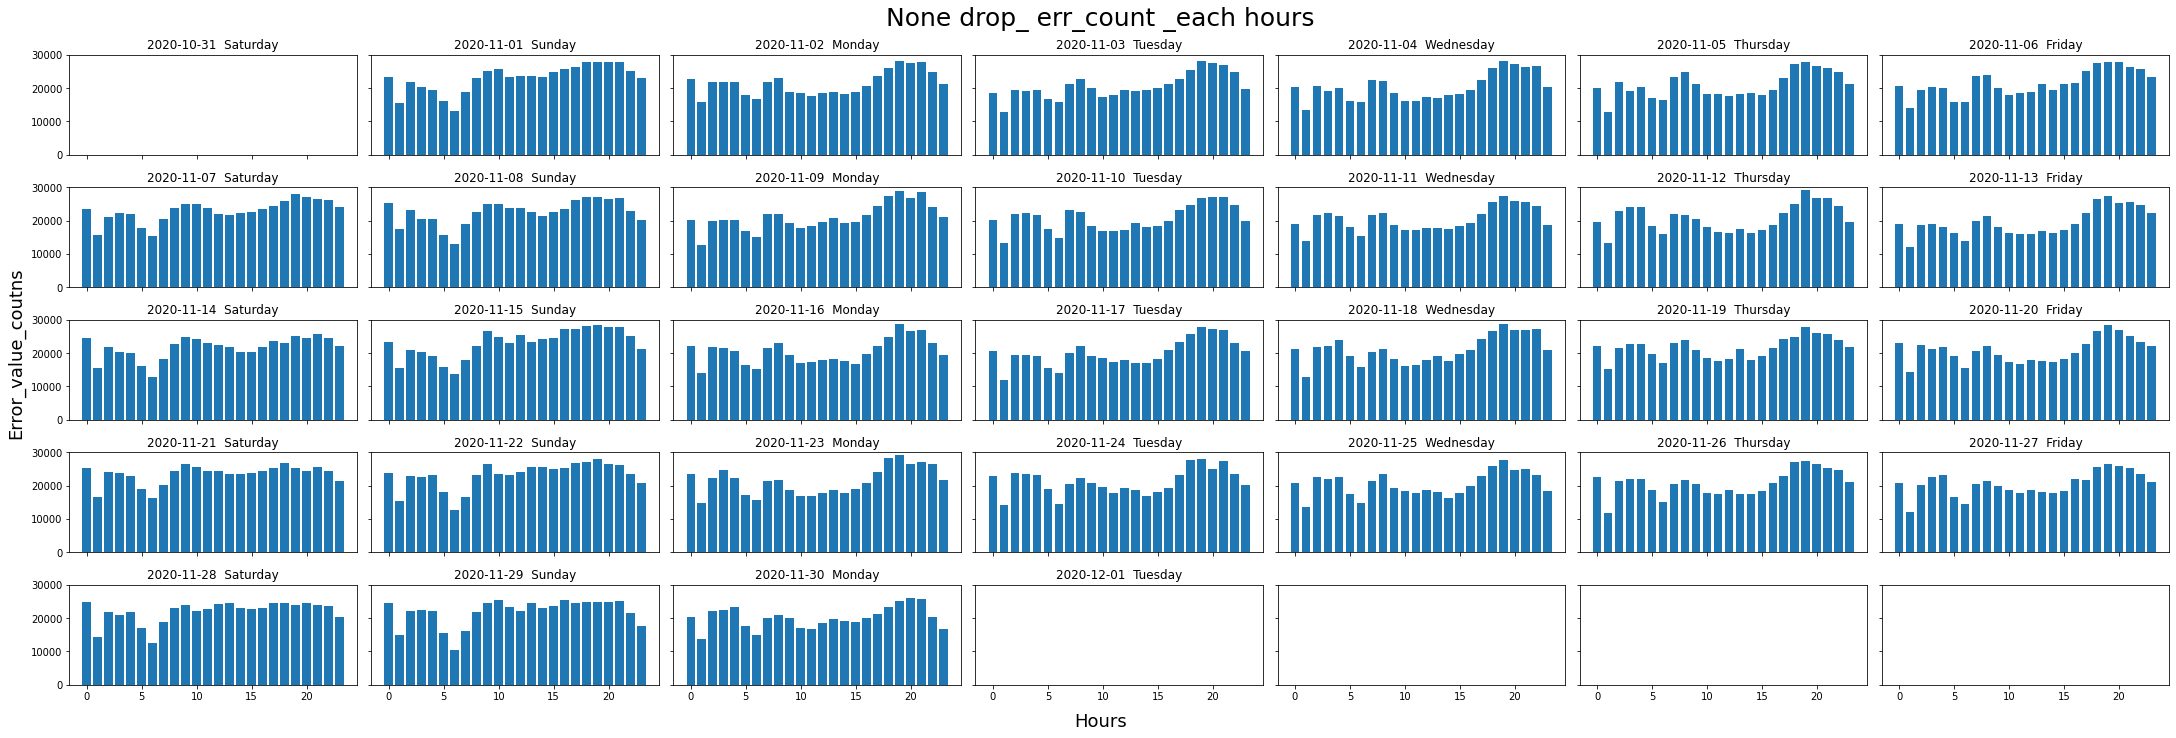

In [96]:

fig , axs = plt.subplots(nrows=5,ncols=7,figsize=(30,10), sharex=True, sharey=True)
plt.suptitle("None drop_ err_count _each hours", size=25)

date = pd.to_datetime('2020-10-31')
df =time_counts_d.groupby('time4').sum()[0].reset_index()

for days in range(32):
    rows =days//7
    cols =days%7
    
    
    date_time = df.loc[df.time4.dt.date ==date]
    loc_df = date_time.sort_values('time4')[0]
    
    if len(loc_df) !=24:
        print(date,' is not 24 hours data')
    
    axs[rows,cols].bar(range(len(loc_df)),loc_df.values)  
    axs[rows,cols].set_title(str(date)[:-9]+"  "+date.day_name())
    axs[rows,cols].set_ylim(0,30000)
    date += datetime.timedelta(days=1)

fig.text(0.5, -0.02, 'Hours', ha='center',fontsize=18)
fig.text(-0.006, 0.5, 'Error_value_coutns', va='center', rotation='vertical',fontsize=18)
    
fig.tight_layout()

오전 1, 6시에 최저값을 찍고 야간시간대 19~21시에 최대값을 찍는다. 전체적인 경향은 비슷하다

## 초단위 에러 발생

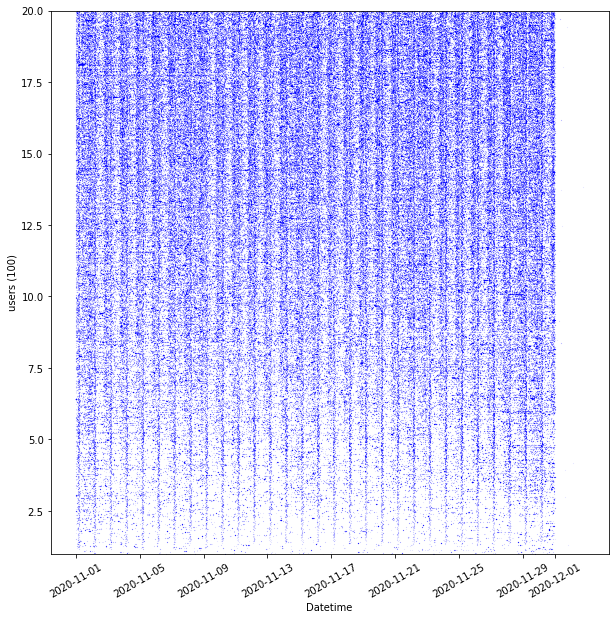

In [29]:
plt.figure(figsize=(10,10))

n=0
ball_size=0.001
update_n = 0.005
a
for value in time_counts_d.user_id.value_counts().sort_values().to_frame().reset_index()['index'][:4000]:
    new_data =time_counts_d.loc[time_counts_d.user_id ==value]
    plt.scatter(new_data.time2,np.zeros(len(new_data))+n,s=ball_size,c='blue')
    n+=update_n
    
plt.ylim(0.99,20)
plt.xlabel("Datetime")
plt.ylabel("users (100)")
plt.xticks(rotation=30)
plt.show()


하위 4000개의 에러 발생시간 (발생시간 중복 데이터 제외)에 대한 시각화    
하단부를 보면 특정 시간대에서 많이 발생한 경향을 확인 할수 있다. 하루에 한번씩 특정시간대에 피크    
하루에 한번씩 업데이트 되는 시스템으로 예상    
주말 기간 동안에 조금더 많은 에러가 발생하고, 매일

## 시간단위 에러발생 

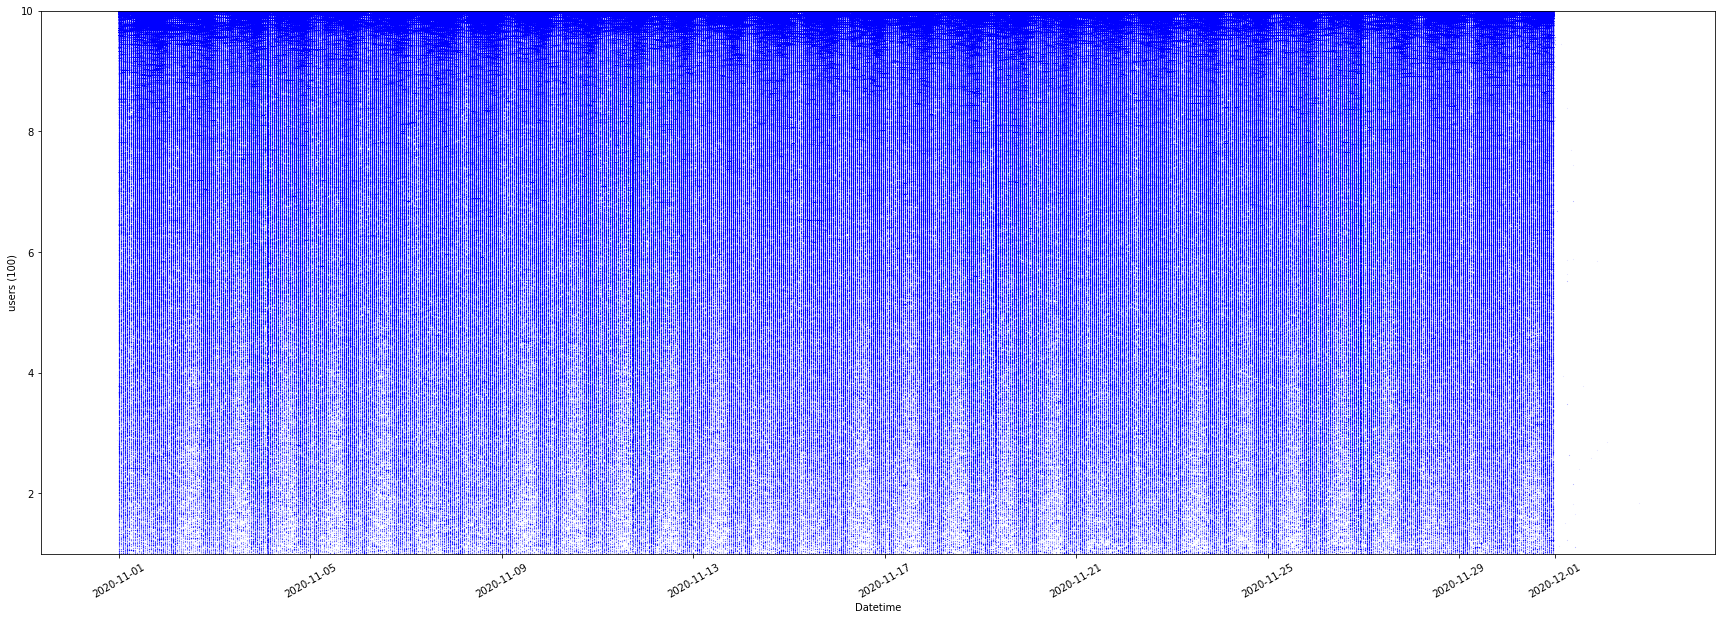

In [110]:
plt.figure(figsize=(30,10))

n=0
ball_size=0.001
YLIM = 10
INDEX_COUNTS =15000
update_n = YLIM/INDEX_COUNTS

df2 =time_counts_d[['user_id','time4']]

for value in time_counts_d.user_id.value_counts().sort_values().to_frame().reset_index()['index'][:INDEX_COUNTS]:
    new_data =df2.loc[df2.user_id ==value]
    plt.scatter(new_data.time4,np.zeros(len(new_data))+n,s=ball_size,c='blue')
    n+=update_n

plt.ylim(0.99,10)
plt.xlabel("Datetime")
plt.ylabel("users (100)")
plt.xticks(rotation=30)
plt.show()